In [38]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
time_series = pd.read_csv("../data/NFT_Time_Series.csv")
time_series.rename(columns = {'Date':'ds', 'Sales_USD':'y'}, inplace = True)
time_series.head()

,ds,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,y,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


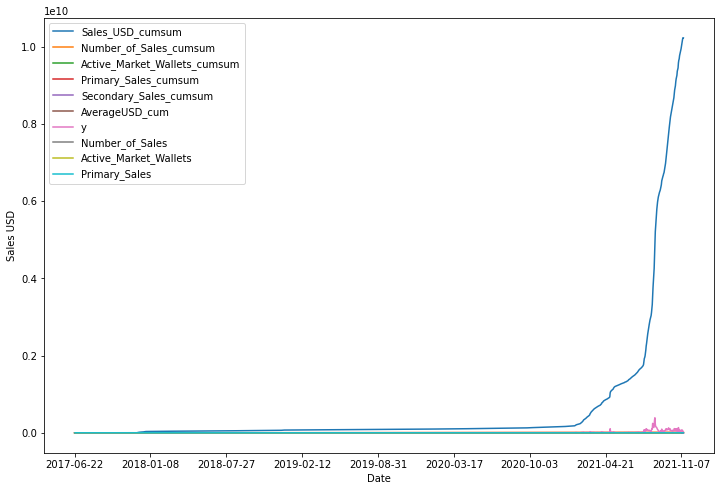

In [40]:
ax = time_series.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

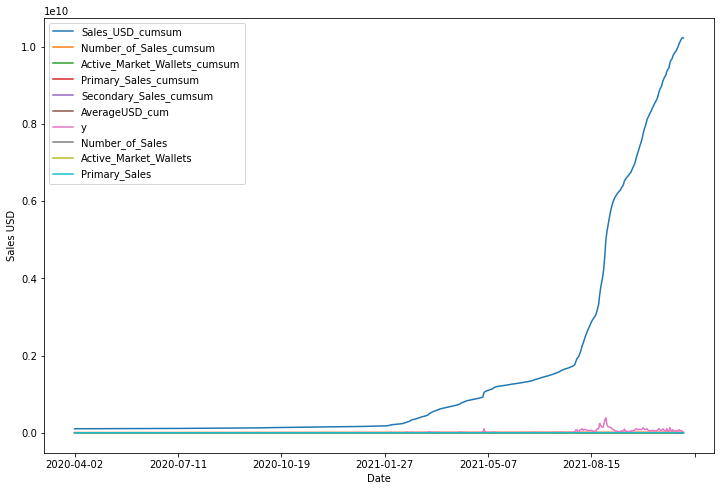

In [41]:
pre_covid = time_series.iloc[:1016,:]
post_covid = time_series.iloc[1016:,:]

post_covid_clean = post_covid[['ds', 'y']]

ax = post_covid.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

In [42]:
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


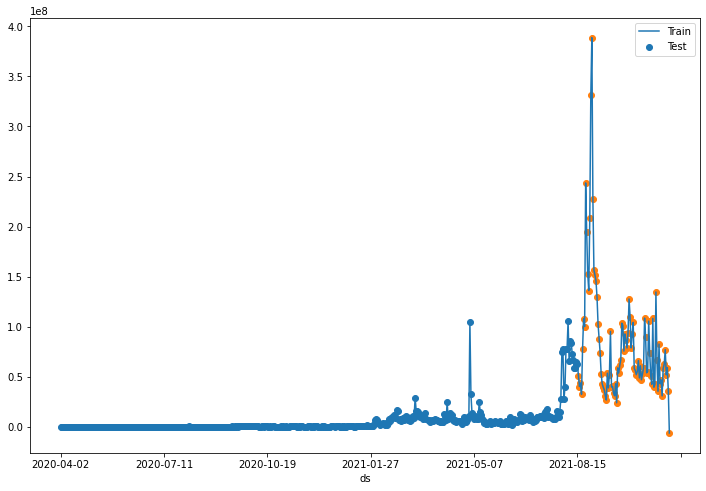

In [62]:
attrs = post_covid.ds
labels = post_covid.y

f_train, f_test, l_train, l_test = train_test_split(attrs, labels, test_size=0.15, shuffle=False)

train_data = pd.concat([f_train, l_train], axis=1)
test_data = pd.concat([f_test, l_test], axis=1)

ax = post_covid_clean.set_index('ds').plot(figsize=(12, 8))
plt.scatter(f_train, l_train)
plt.scatter(f_test, l_test)
plt.legend(["Train", "Test"])

I fixed the x - axis disaster!!

In [44]:
model = Prophet(interval_width=0.95)
model.fit(train_data)

future = model.make_future_dataframe(periods=3, freq='MS')

forecast = model.predict(future)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
499,2021-08-14,3.098847e+07,1.001679e+07,5.122186e+07
500,2021-08-15,3.183973e+07,1.198581e+07,5.226275e+07
501,2021-09-01,3.451486e+07,1.562651e+07,5.459652e+07
502,2021-10-01,4.146942e+07,2.174766e+07,6.072500e+07
503,2021-11-01,4.875847e+07,2.626810e+07,6.833235e+07


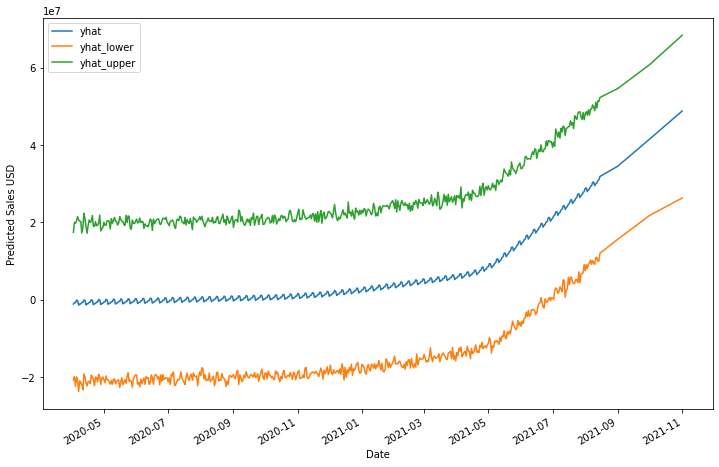

In [45]:
ax = forecast.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

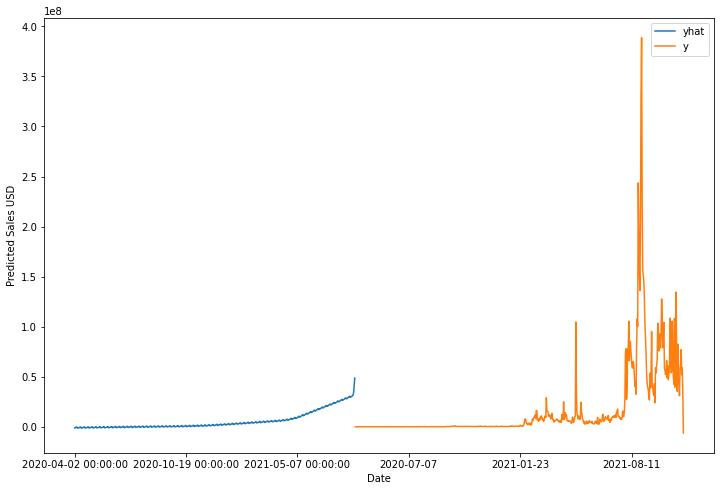

In [46]:
forecast = forecast[['ds', 'yhat']]
dfs = [forecast, post_covid_clean]
compare = pd.concat(dfs)

ax = compare.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

Ok so this graph is comparing the predicted (blue) values with the actual (orange values). Obviously we need to reformat the date/timestamp of the predicted values which I spent like an hour trying to do to no avail. It's now a next week problem. 

We are having some trouble deciding on the best way to split the time series data because the trend is pretty much no nfts --> covid --> some nfts --> a shit ton of nfts. Except, obviously, profit can't predict covid. And because covid wasn't too long ago and the actual values are so erratic, its difficult to make a prediction.

[]

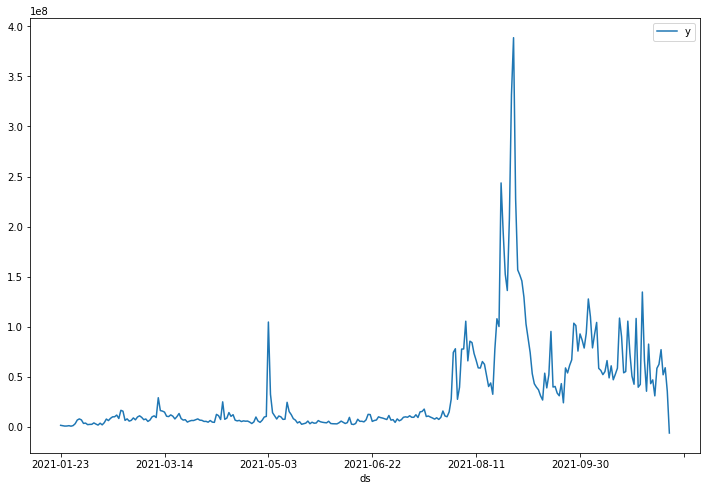

In [57]:
#Now lets predict the actual future!

nft_spike = post_covid_clean.iloc[296:,:]
nft_spike.head()

ax = nft_spike.set_index('ds').plot(figsize=(12, 8))

plt.plot()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


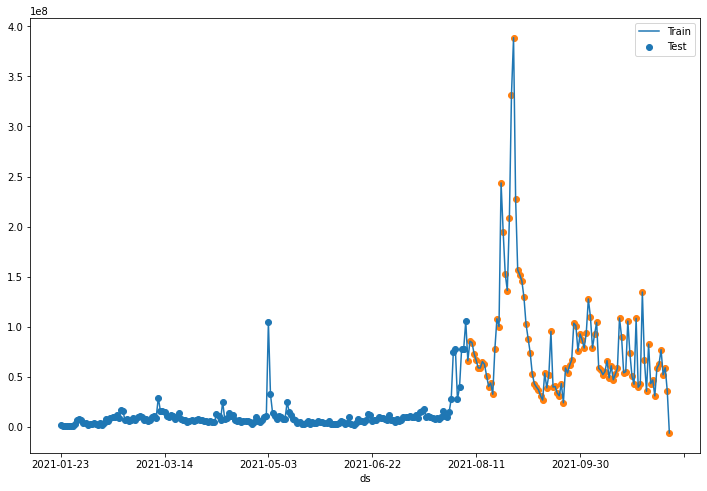

In [67]:
attrs = nft_spike.ds
labels = nft_spike.y

f_train, f_test, l_train, l_test = train_test_split(attrs, labels, test_size=0.33, shuffle=False)

train_data = pd.concat([f_train, l_train], axis=1)
test_data = pd.concat([f_test, l_test], axis=1)

ax = nft_spike.set_index('ds').plot(figsize=(12, 8))

plt.scatter(f_train, l_train)
plt.scatter(f_test, l_test)
plt.legend(["Train", "Test"])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


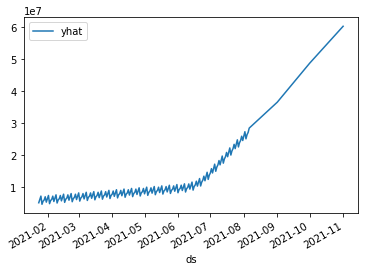

In [70]:
model_3_mo = Prophet(interval_width=0.95)
model_3_mo.fit(train_data)

future_3_mo = model_3_mo.make_future_dataframe(periods=3, freq='MS')

forecast_3_mo = model_3_mo.predict(future_3_mo)
forecast_3_mo = forecast_3_mo[['ds', 'yhat']]

forecast_3_mo = forecast_3_mo[['ds', 'yhat']]
#dfs_3_mo = [forecast_3_mo, nft_spike]
#comp = pd.concat(dfs)

#ax = comp.set_index('ds').plot(figsize=(12, 8))
#ax.set_ylabel('Predicted Sales USD')
#ax.set_xlabel('Date')
ax = forecast_3_mo.set_index('ds').plot()
plt.show()

Next steps: We need to get the actual and the predicted on the same plot correctly so that we can calculate error! Then I think we're pretty much done.